Эта тетрадь представляет собой упражнение из промежуточного курса машинного обучения. Вы можете ознакомиться с учебным пособием по этой ссылке.

Теперь ваша очередь проверить свои новые знания об обработке пропущенных значений. Возможно, вы обнаружите, что это имеет большое значение.

# Установка

Ответы на вопросы помогут вам оценить вашу работу. Запустите следующую ячейку, чтобы настроить систему обратной связи.

In [ ]:
# Настройка проверки кода
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex2 import *
print("Setup Complete")

В этом упражнении вы будете работать с данными конкурса цен на жилье для пользователей Kaggle Learn.
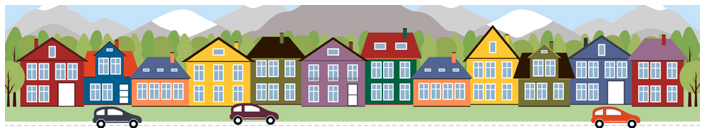
Запустите следующую ячейку кода без изменений, чтобы загрузить обучающий и проверочный наборы в X_train, X_valid, y_train и_valid. Тестовый набор загружен в X_test.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Считайте данные
X_full = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Удалите строки с отсутствующей целью, отделите цель от предикторов.
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Чтобы упростить задачу, мы будем использовать только числовые предикторы
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Отделить набор для проверки от обучающих данных
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Используйте следующую ячейку кода для печати первых пяти строк данных.

In [ ]:
X_train.head()

Вы уже можете увидеть несколько пропущенных значений в первых строках. На следующем шаге вы получите более полное представление о пропущенных значениях в наборе данных.

# Шаг 1: Предварительное исследование

Запустите приведенную ниже ячейку кода без изменений.

In [ ]:
# Форма обучающих данных (num_rows, num_columns)
print(X_train.shape)

# Количество пропущенных значений в каждом столбце обучающих данных
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Часть А

Используйте приведенные выше результаты для ответа на вопросы, приведенные ниже.

In [ ]:
# Заполните строку ниже: Сколько строк содержится в обучающих данных?
num_rows = ____

# Заполните строку ниже: Сколько столбцов в обучающих данных
# содержат пропущенные значения?
num_cols_with_missing = ____

# Заполните строку ниже: Сколько пропущенных элементов содержится в 
# всех данных об обучении?
tot_missing = ____

# Часть B

Учитывая ваши ответы выше, какой, по вашему мнению, наилучший подход к устранению пропущенных значений?

In [ ]:
# Проверьте свой ответ (введите этот код в ячейку, чтобы получить зачет!)
step_1.b.check()

Чтобы сравнить различные подходы к работе с пропущенными значениями, вы будете использовать ту же функцию score_dataset() из руководства. Эта функция отображает среднюю абсолютную ошибку (MAE) из модели случайного леса.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Функция для сравнения различных подходов
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Шаг 2: Удалите столбцы с пропущенными значениями

На этом шаге вы предварительно обработаете данные в X_train и X_valid, чтобы удалить столбцы с пропущенными значениями. Установите для предварительно обработанных фреймов данных значения reduced_X_train и reduced_X_valid соответственно.

In [ ]:
# Заполните строку ниже: получите названия столбцов с пропущенными значениями
____ # Ваш код здесь

# Заполните строки ниже: удалите столбцы из данных об обучении и валидации
reduced_X_train = ____
reduced_X_valid = ____

Запустите следующую ячейку кода без изменений, чтобы получить MAE для этого подхода.

In [ ]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

# Шаг 3: Вычисление

Часть A

Используйте следующую ячейку кода, чтобы сопоставить пропущенные значения со средним значением по каждому столбцу. Установите для предварительно обработанных фреймов данных значения imputed_X_train и imputed_X_valid. Убедитесь, что имена столбцов совпадают с именами в X_train и X_valid.

In [ ]:
from sklearn.impute import SimpleImputer

# Заполните нижеприведенные строки: расчет
____ # Ваш код здесь
imputed_X_train = ____
imputed_X_valid = ____

# Заполните нижеприведенные строки: при расчете убраны названия столбцов; верните их на место
imputed_X_train.columns = ____
imputed_X_valid.columns = ____

Запустите следующую ячейку кода без изменений, чтобы получить MAE для этого подхода.

In [ ]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

# Часть B

Сравните эффективность каждого подхода. Вас что-то удивило в результатах? Как вы думаете, почему один подход показал лучшие результаты, чем другой?

# Шаг 4: Генерируем тестовые прогнозы

На этом последнем шаге вы будете использовать любой подход по вашему выбору для устранения пропущенных значений. Предварительно обработав функции обучения и проверки, вы подготовите и оцените модель случайного леса. Затем вы предварительно обработаете тестовые данные, прежде чем сгенерировать прогнозы, которые можно будет отправить на конкурс!

# Часть А

Используйте следующую ячейку кода для предварительной обработки обучающих и валидационных данных. Установите для предварительно обработанных фреймов данных значения final_X_train и final_X_valid. Здесь вы можете использовать любой подход по вашему выбору! для того чтобы этот шаг был отмечен как правильный, вам нужно только убедиться:

предварительно обработанные фреймы данных содержат одинаковое количество столбцов,
в предварительно обработанных фреймах данных нет пропущенных значений,
final_X_train и_train имеют одинаковое количество строк, а
final_X_valid и_valid имеют одинаковое количество строк.

In [1]:
# Предварительно обработанные функции обучения и валидации
final_X_train = ____
final_X_valid = ____

NameError: name '____' is not defined

Запустите следующую ячейку кода для обучения и оценки модели случайного леса. (Обратите внимание, что мы не используем функцию score_dataset(), описанную выше, потому что вскоре мы будем использовать обученную модель для генерации тестовых прогнозов!)

In [ ]:
# Определение и подгонка модели
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Получайте подтверждающие прогнозы и МЭЙ
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

# Часть B

Используйте следующую ячейку кода для предварительной обработки тестовых данных. Убедитесь, что вы используете метод, соответствующий тому, как вы предварительно обрабатывали данные обучения и проверки, и установите для предварительно обработанных тестовых функций значение final_X_test.

Затем используйте предварительно обработанные тестовые функции и обученную модель для генерации тестовых прогнозов в press_test.

Чтобы этот шаг был отмечен как правильный, вам нужно только убедиться, что:

предварительно обработанный тестовый фрейм данных не содержит пропущенных значений, а
final_X_test содержит то же количество строк, что и X_test.

In [ ]:
# Заполните строку ниже: предварительная обработка тестовых данных
final_X_test = ____

# Заполните строку ниже, чтобы получить прогноз теста.
preds_test = ____

Запустите следующую ячейку кода без изменений, чтобы сохранить свои результаты в CSV-файле, который можно отправить непосредственно на конкурс.

In [ ]:
# Сохраните прогнозы тестов в файл
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

Отправьте свои результаты

Как только вы успешно выполните шаг 4, вы будете готовы внести свои результаты в таблицу лидеров! (Вы также узнали, как это сделать в предыдущем упражнении. Если вам нужно напоминание о том, как это сделать, пожалуйста, воспользуйтесь приведенными ниже инструкциями.)

Сначала вам нужно присоединиться к конкурсу, если вы еще этого не сделали. Откройте новое окно, перейдя по этой ссылке. Затем нажмите на кнопку Присоединиться к конкурсу.
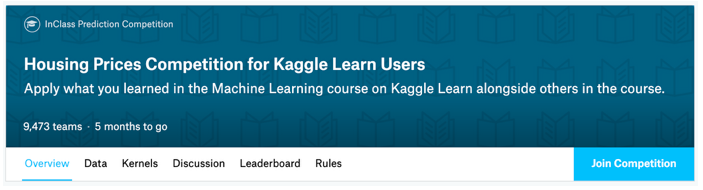
Далее следуйте приведенным ниже инструкциям:

Для начала нажмите на кнопку Сохранить версию в правом верхнем углу окна. Откроется всплывающее окно.
Убедитесь, что выбран параметр Сохранить и запустить все, а затем нажмите на кнопку Сохранить.
В результате в левом нижнем углу записной книжки откроется окно. После завершения работы нажмите на цифру справа от кнопки Сохранить версию. В правой части экрана появится список версий. Нажмите на многоточие (...) справа от самой последней версии и выберите Открыть в программе просмотра. После этого вы перейдете в режим просмотра той же страницы. Вам нужно будет прокрутить страницу вниз, чтобы вернуться к этим инструкциям.
Перейдите на вкладку "Данные" в верхней части экрана. Затем выберите файл, который вы хотите отправить, и нажмите кнопку "Отправить", чтобы добавить свои результаты в таблицу лидеров.
Теперь вы успешно приняли участие в конкурсе!

Если вы хотите продолжить работу над улучшением своей производительности, нажмите кнопку "Редактировать" в правом верхнем углу экрана. Затем вы можете изменить свой код и повторить процесс. Есть много возможностей для улучшения, и по мере работы вы будете подниматься в таблице лидеров.

# Продолжай

Далее вы узнаете, что такое категориальные переменные и как их использовать в моделях машинного обучения. Категориальные переменные очень часто используются в реальных данных, но вы получите сообщение об ошибке, если попытаетесь включить их в свои модели без предварительной обработки!